# MNIST with CNN in Keras - Detailed explanation

### **Ane Berasategi** - 25/07/2018

* **0. Introduction**

* **1. Data pre-processing**
    * 1.1. Load data
    * 1.2. Check shape, data type
    * 1.3. Extract xtrain, ytrain
    * 1.4. Mean and std of classes
    * 1.5. Check nuls and missing values
    * 1.6. Visualization
    * 1.7. Normalization
    * 1.8. Reshape
    * 1.9. One hot encoding of label
    * 1.10. Split training and validation sets  
    
* **2. CNN**
    * 2.1. Define model architecture
    * 2.2. Compile the moedl
    * 2.3. Set other parameters 
    * 2.5. Fit model
    * 2.6. Plot loss and accuracy
    * 2.7. Plot confusion matrix
    * 2.8. Plot errors

* **3. Predict and save to csv**

    

# 0. Introduction

This is my first CNN kernel and as such, I believe the [Digit Recognizer dataset/competition](https://www.kaggle.com/c/digit-recognizer) is a very suitable set of images for a beginner CNN project, considering the image size is homogeneous across all images (not common in real-world problems), that the size is small (28x28) so no resizing required, they are in grayscale and they are already in a csv, which can be easily read into a dataframe. 

<img src="http://img1.imagilive.com/0717/mnist-sample.png" ></img>

Given the comfort that this dataset provides and taking inspration from very popular kernels such as [yassineghouzam's kernel](https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6) and [poonaml's kernel](https://www.kaggle.com/poonaml/deep-neural-network-keras-way) among others, I've created my own kernel joining what I have found most useful from each kernel, as well as adding what I have learnt in the process and other notes that may be helpful for others or for future me.

The kernel consists in 3 main parts:
   * Data preparation
 Firstly, even if the input data is already quite clean as mentioned before, it still needs some preparation and pre-processing in order to be in an appropriate format to then later be fed to the NN. This includes data separation, reshaping and visualization which might give insight to the data scientist as to the nature of the images.
   * CNN
Afterwards, the NN is defined (this is where Keras comes in), the convolutional steps added, NN parameters initialized, and the model trained. This part takes the most time in a ML project.
   * Evaluation
Once the model is trained, it's interesting to evaluate the model performance by seeing the progress of the loss and extract some conclusions, that the model is overfitting, or if there is high variance for instance.

If you find some errors in theoretical concepts, comments of any kind or suggestions, please do let me know :)

In [1]:
# import libraries

import numpy as np # linear algebra, matrix multiplications
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# 1. Data pre-processing
## 1.1 Load data

   * train
this is the data used to train the CNN.  
the image data and their corresponding class is provided.   
the CNN learns the weights to create the mapping from the image data to their corresponding class.  


   * test
this is the data used to test the CNN.  
only the image data is provided.  
the prediction is submitted to the competition and depending on the accuracy, a score is obtained.

In [2]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

## 1.2. Check shape, data type

   * train
the train dataframe contains data from 42k images.  
the data from each image is streched out in 1D with 28*28 = 784 pixels.  
the first column is the label/class it belongs to, the digit it represents.  


   * test
the test dataframe contains data from 28k images.  
this data shall be fed to the CNN so that it's new data, that the CNN has never seen before.  
same as in the train dataset, image data is streched out in 1D with 784 pixels.  
there is no label information, that is the goal of the competition, predicting labels as well as possible.

In [3]:
# check data

print(train.shape)
ntrain = train.shape[0]

print(test.shape)
ntest = test.shape[0]

train.head(10)

(42000, 785)
(28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# check data type
print(train.dtypes) # all int64, otherwise do train = train.astype('int64')

print(train.dtypes) # all int64, otherwise do test = test.astype('int64')

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
pixel5      int64
pixel6      int64
pixel7      int64
pixel8      int64
pixel9      int64
pixel10     int64
pixel11     int64
pixel12     int64
pixel13     int64
pixel14     int64
pixel15     int64
pixel16     int64
pixel17     int64
pixel18     int64
pixel19     int64
pixel20     int64
pixel21     int64
pixel22     int64
pixel23     int64
pixel24     int64
pixel25     int64
pixel26     int64
pixel27     int64
pixel28     int64
            ...  
pixel754    int64
pixel755    int64
pixel756    int64
pixel757    int64
pixel758    int64
pixel759    int64
pixel760    int64
pixel761    int64
pixel762    int64
pixel763    int64
pixel764    int64
pixel765    int64
pixel766    int64
pixel767    int64
pixel768    int64
pixel769    int64
pixel770    int64
pixel771    int64
pixel772    int64
pixel773    int64
pixel774    int64
pixel775    int64
pixel776    int64
pixel777    int64
pixel778  

## 1.2 Extract xtrain, ytrain 
The CNN will be fed xtrain and it will learn the weights to map xtrain to ytrain

In [5]:
# extract xtrain, ytrain

# array containing labels of each image
ytrain = train["label"]
print("Shape of ytrain: ", ytrain.shape)

# dataframe containing all pixels (the label column is dropped)
xtrain = train.drop("label", axis=1)

# the images are in square form, so dim*dim = 784
from math import sqrt
dim = int(sqrt(xtrain.shape[1]))
print("The images are {}x{} squares.".format(dim, dim))

print("Shape of xtrain: ", xtrain.shape)

Shape of ytrain:  (42000,)
The images are 28x28 squares.
Shape of xtrain:  (42000, 784)


In [6]:
ytrain.head(5)

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

## 1.3. Mean and std of the classes

(42000,)
<class 'pandas.core.series.Series'>
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64
The mean amount of elements per class is 4200.0
The standard deviation in the element per class distribution is 237.08929400825616


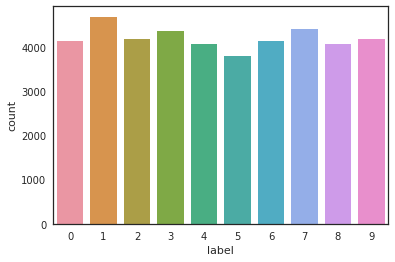

In [7]:
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

# plot how many images there are in each class
sns.countplot(ytrain)

print(ytrain.shape)
print(type(ytrain))

# array with each class and its number of images
vals_class = ytrain.value_counts()
print(vals_class)

# mean and std
cls_mean = np.mean(vals_class)
cls_std = np.std(vals_class,ddof=1)

print("The mean amount of elements per class is", cls_mean)
print("The standard deviation in the element per class distribution is", cls_std)

# 68% - 95% - 99% rule, the 68% of the data should be cls_std away from the mean and so on
# https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule
if cls_std > cls_mean * (0.6827 / 2):
    print("The standard deviation is high")
    
# if the data is skewed then we won't be able to use accurace as its results will be misleading and we may use F-beta score instead.

> Summary

Shape of xtrain is: (42000, 784)  
Shape of ytrain is: (42000, )  
Shape of test is: (28000, 784)  

number of classes = 10, the distribution of the pictures per class has a mean of 4200 images and a std of 237 images.     
The digit 1 has the most representation (4684 images) and the digit 5 the least (3795 images). This data can be seen by printing *vals_class*  
This corresponds to a small standard deviation (5.64%) so there is no class imbalance. In case there was, other techniques would have to be considered but this is outside the scope of this notebook.

## 1.4. Check nuls and missing values
```python
df.isnull()
```
returns a boolean df with true if value is NaN and false otherwise.  
```python
df.isnull().any()
```
returns a df with 1 col and ncol rows where each row says if there is a NaN value present in that col.  
```python
df.isnull().any().any()
```
returns a bool with True if any of the df.isnull().any() rows is True

In [8]:
# Check the data

def check_nan(df):
    print(df.isnull().any().describe())
    print("There are missing values" if df.isnull().any().any() else "There are no missing values")

    if df.isnull().any().any():
        print(df.isnull().sum(axis=0))
        
    print()
        
check_nan(xtrain)
check_nan(test)

count       784
unique        1
top       False
freq        784
dtype: object
There are no missing values

count       784
unique        1
top       False
freq        784
dtype: object
There are no missing values



## 1.5. Visualization

The first nine images in the dataset (which are not ordered by digit) are plotted, just for visualization. There is only one color channel (grayscale) and moreover the pixels are binarized, meaning that hey are either black (with value 0) or white (255). This makes the classification problem easier. Imagine that the CNN received colored digits, either solid, gradient, or digits with many colors. Probably some part of the neural network would focus on learning to tell the digits apart by looking at the colors, when the actual difference between the digits is in their shape.

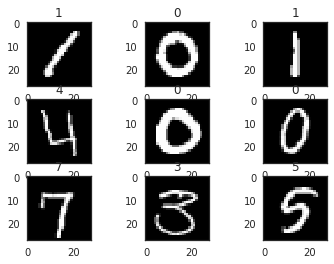

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# convert train dataset to (num_images, img_rows, img_cols) format in order to plot it
xtrain_vis = xtrain.values.reshape(ntrain, dim, dim)

# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html
# subplot(2,3,3) = subplot(233)
# a grid of 3x3 is created, then plots are inserted in some of these slots
for i in range(0,9): # how many imgs will show from the 3x3 grid
    plt.subplot(330 + (i+1)) # open next subplot
    plt.imshow(xtrain_vis[i], cmap=plt.get_cmap('gray'))
    plt.title(ytrain[i]);

## 1.6. Normalization
Pixels are represented in the range [0-255], but the NN converges faster with smaller values, in the range [0-1] so they are normalized to this range.


In [10]:
# Normalize the data
xtrain = xtrain / 255.0
test = test / 255.0

## 1.7. Reshape

In [11]:
# reshape of image data to (nimg, img_rows, img_cols, 1)
def df_reshape(df):
    print("Previous shape, pixels are in 1D vector:", df.shape)
    df = df.values.reshape(-1, dim, dim, 1) 
    # -1 means the dimension doesn't change, so 42000 in the case of xtrain and 28000 in the case of test
    print("After reshape, pixels are a 28x28x1 3D matrix:", df.shape)
    return df

xtrain = df_reshape(xtrain) # numpy.ndarray type
test = df_reshape(test) # numpy.ndarray type

Previous shape, pixels are in 1D vector: (42000, 784)
After reshape, pixels are a 28x28x1 3D matrix: (42000, 28, 28, 1)
Previous shape, pixels are in 1D vector: (28000, 784)
After reshape, pixels are a 28x28x1 3D matrix: (28000, 28, 28, 1)


> Note

In real world problems, the dimensions of images could diverge from this particular 28x28x3 set in two ways:
   * Images are usually much bigger

In this case all images are 28x28x1, but in another problem I'm working on, I have images of 3120x4160x3, so much bigger and in RGB. Usually images are resized to much smaller dimensions, in my case I'm resizing them to 64x64x3 but they can be made much smaller depending on the problem. In this MNIST dataset there is no such problem since the dimensions are already small.
   * Images don't usually have the same dimensions
   
Different dimension images are a problem since dense layers at the end of the CNN have a fixed number of neurons, which cannot be dynamically changed. This means that the layer expects fixed image dimensions, which means all images must be resized to the same dimensions before training. There is another option, namely, using a FCN (fully convoluted network) which consits solely of convolutional layers and a very big pooling in the end, so each image can be of any size, but this architecture isn't as popular as the CNN + FC (fully connected) layers which is the one I'm familiarized with.  
There are various methods to make images have the same dimensions:
   * resize to a fixed dimension
   * add padding to some images and resize
   * ...  

In my other problem I have scanned pictures, so I trim the whitespace and resize afterwards. Being this a beginner-friendly dataset, all digits are the same size, binarized and well centered so no need to worry about resizing.



## 1.8. One hot encoding of label

At this point in the notebook the labels vary in the range [0-9] which is intuitive, but in order to define the type of loss for the NN later, which in this case is categorical_crossentropy (reason is explained in section 2), the targets should be in categorical format (=one hot-vectors): ex : 2 -> [0,0,1,0,0,0,0,0,0,0]

ytrain before  
0    1  
1    0  
2    1  
3    4  
4    0  

where the first column is the index,

ytrain after  
[[0. 1. 0. ... 0. 0. 0.]  
 [1. 0. 0. ... 0. 0. 0.]  
 [0. 1. 0. ... 0. 0. 0.]  
 ...  
 [0. 0. 0. ... 1. 0. 0.]  
 [0. 0. 0. ... 0. 0. 0.]  
 [0. 0. 0. ... 0. 0. 1.]]


In [12]:
from keras.utils.np_utils import to_categorical

print(type(ytrain))
# number of classes, in this case 10
nclasses = ytrain.max() - ytrain.min() + 1

print("Shape of ytrain before: ", ytrain.shape) # (42000,)

ytrain = to_categorical(ytrain, num_classes = nclasses)

print("Shape of ytrain after: ", ytrain.shape) # (42000, 10), also numpy.ndarray type
print(type(ytrain))

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


<class 'pandas.core.series.Series'>
Shape of ytrain before:  (42000,)
Shape of ytrain after:  (42000, 10)
<class 'numpy.ndarray'>


## 1.9. Split training and validation sets

The available data is 42k images. If the NN is trained with these 42k images, it might overfit and respond poorly to new data. Overfitting means that the NN doesn't generalize for the digits, it just learns the differences in those 42k images. When faced with new digits slightly different, the performance decreases considerably. This is not a good outcome, since the goal of the NN is to learn from the training set digits so that it does well on the **new digits**.

In order to avoid submitting the predictions and risking a bad performance, and to determine whether the NN overfits, a small percentage of the train data is separated and named validation data. The ratio of the split can vary from 10% in small datasets to 1% in cases with 1M images.

The NN is then trained with the remaining of the training data, and in each step/epoch, the NN is tested against the validation data and we can see its performance. That way we can watch how the loss and accuracy metrics vary during training, and in the end determine where there is overfitting and take action (more on this later). For example, the results I had after the 20th epoch with a certain CNN architecture which turned out to overfit:

> loss: 0.0066 - acc: 0.9980 - val_loss: 0.0291 - val_acc: 0.9940

In this example and without getting much into detail, the __training loss__ is very low while the __val_loss__ is 4 times higher, and the __training accuracy__ is a little higher than the __val_acc__. The accuracy difference is not that much, partly because we are talking about 0.998 vs 0.994, which is exceptionally high, but the difference in loss suggests an overfitting problem.

Coming back to the general idea, the **val_acc** is the important metric. The NN might do very well with trained data but the goal is that the NN learns to generalize other than learning the training data "by heart". If the NN does well with val data, it's probable that it generalizes well to a certain extent and it will do well with the test data. (more on this in section 2 regarding CNNs).

__random_state__ in train_test_split ensures that the data is pseudo-randomly divided.  
If the images were ordered by class, activating this feature guarantees their pseudo-random split.  
The seed means that every time this pseudo-randomization is applied, the distribution is the same.

__stratify__ in train_test_split ensures that there is no overrepresentation of classes in the val set.  
It is used to avoid some labels being overrepresented in the val set.   
> Note: only works with sklearn version > 0.17

In [13]:
from sklearn.model_selection import train_test_split

# fix random seed for reproducibility
seed = 2
np.random.seed(seed)

# percentage of xtrain which will be xval
split_pct = 0.1

# Split the train and the validation set
xtrain, xval, ytrain, yval = train_test_split(xtrain,
                                              ytrain, 
                                              test_size=split_pct,
                                              random_state=seed,
                                              stratify=ytrain
                                             )

print(xtrain.shape, ytrain.shape, xval.shape, yval.shape)

(37800, 28, 28, 1) (37800, 10) (4200, 28, 28, 1) (4200, 10)


> Summary

The available data is now divided as follows:
* **Train data**: images (xtrain) and labels (ytrain), 90% of the available data
* **Validation data**: images (xval) and labels (yval), 10% of the available data

# 2. CNN

In this section the CNN is defined, including architecture, optimizers, metrics, learning rate reductions, data augmentation... Then it is compiled and fit to the training set.

In [14]:
from keras import backend as K

# for the architecture
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, AvgPool2D

# optimizer, data generator and learning rate reductor
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

## 2.1. Define model architecture

My final CNN architechture is:
> In &rarr; [ [Conv2D &rarr; relu]\*2 &rarr; MaxPool2D &rarr; Dropout ]\*2 &rarr; Flatten &rarr; Dense &rarr; Dropout &rarr; Out

I'd like to encourage everyone who wants to learn about CNNs to begin with a simpler one, such as

> In &rarr; [Conv2D &rarr; relu] &rarr; MaxPool2D &rarr; Dropout &rarr; Flatten &rarr; Dense &rarr; Dropout &rarr; Out

, check the performance and keep adding layers or tweaking the parameters until you reach an architecture (that may or may not be like mine) with a __val_acc__ of 0.996 more or less, trying to improve that takes much more time and it's really about the details, but of course feel free to try it out. I just encourage that you build your own model and do your own tests, instead of looking at an already well-performing model and using that.

In my case I started with the simple architecture, kept a log where I wrote down the loss and accuracy results, changed one thing at a time, checked performance and how it changed regarding the previous version, wrote down the changes I had made and how the result changed, and made further changes based on that.

More info on CNN architectures here: [How to choose CNN Architecture MNIST](https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist)

### Architecture layers

You can read about the theory of CNNs on the Internet from people more knowledgeable than me and who surely explain it much better. So I will skip the theory explanation for the Conv2D, MaxPool2D, Flatten and Dense layers and I will focus on smaller details.

   * Conv2D
   
      * __filters__: usually on the first convolutional layers there are less filters, and more deeper down the CNN. Usually a power of 2 is set, and in this case 16 offered poorer performance and I didn't want to make a big CNN with 64 or 128 filters for digit classification.
      
      * __kernel_size__: this is the filter size, usually (3,3) or (5,5) is set. I advise setting one, building the architecture and changing it to see if it affects the performance though it usually doesn't.
      
      * __padding__: two options
      
         * valid padding: no padding, the image shrinks after convolution: n - f + 1
         * same padding: padding of 2, the image doesn't shrink after convolution: p = (f-1)/2 &rarr; (n+2) - f(=3) + 1 = n
         
      * __activation__: ReLU is represented mathematically by max(0,X) and offers good performance in CNNs (source: the Internet)

   * MaxPool2D: the goal is to reduce variance/overfitting and reduce computational complexity since it makes the image smaller. two pooling options
   
      * MaxPool2D: extracts the most important features like edges
      * AvgPool2D: extracts smooth features
      
      My personal conclusion then is that for binarized images, with noticeable edge differences, MaxPool performs better.
      
      
   * Dropout: you can read the theory on the Internet, it's a useful tool to reduce overfitting. The net becomes less sensitive to the specific weights of neurons and is more capable of better generalization and less likely to overfit to the train data. The optimal dropout value in Conv layers is 0.2, and if you want to implement it in the dense layers, its optimal value is 0.5: [Dropout in ML](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5)

In [26]:
model = Sequential()

dim = 28
nclasses = 10

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(dim,dim,1)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu',))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(nclasses, activation='softmax'))

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        102464    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
__________

This summary shows the summary of the model, displaying each layer with the shape of the output as well as the number of parameters it needs. The first dense layer is the one with the most parameters, since it maps the 3136 outputs of the Flatten layer to the 120 neurons of the Dense layer. Since the layer is a fully connected layer, the number of parameters is: 120 * 3136 + 120.

The amount of trainable parameters is roughly half a million, which is not that much considering the architecture has medium size and the input dimensions (28,28,3) are small. 

## 2.2. Compile the model

   * **Optimizer**: it represents the gradient descent algorithm, whose goal is to minimize the cost function to approach the minimum point. **Adam** optimizer is one of the best-performing algorithms: [Adam: A Method for Stochastic Optimization](https://arxiv.org/abs/1412.6980v8). The default learning rate for the Adam optimizer is 0.001. Another optimizer choice may be RMSprop or SGD.

   * **Loss function**: It is a measure of the overall loss in the network after assigning values to the parameters during the forward phase so it indicates how well the parameters were chosen during the forward propagation phase. This loss function requires the labels to be encoded as one-hot vectors which is why this step was taken back in 1.8. 

   * **Metrics**: this refers to which metric the network should achieve, the most common one being 'accuracy' but there are other metrics to measure the performance other than accuracy, such as precision or recall or F1 score. The choice depends on the problem itself. Where high recall means low number of false negatives , High precision means low number of false positives and F1 score is a trade off between them: [Precision-Recall](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html). Depending on the problem, accuracy may not be the best metric. Suppose a binary classification problem where there are much more 0 values than 1, and therefore it's crucial that the predicted 1's are mostly correct. A network that just outputs 0 every time would get very high accuracy but the model still wouldn't perform well. Take the popular example:
   
   > A ML company has built a tool to identify terrorists among the population and they claim to have 99.99% accuracy. When inspecting their product, turns out they just output 0 in every case. Since there is only one terrorist for every 10000 people (this is made up, I actually have no idea what the probability is but all I know is that it's very low), the company has a very high precision, but there's no need of a ML tool for that. With the class imbalance being so high, accuracy is not a good metric anymore and other options should be considered.

In [28]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

## 2.3. Set other parameters 

### Learning rate annealer

This is a useful tool which reduces the learning rate when there is a plateau on a certain value, which you can specify. In this case the monitoring value is __val_acc__. When there is no change in __val_acc__ in 3 epochs (patience), the learning rate is multiplied by 0.5 (factor). If the learning rate has the value of min_lr, it stops decreasing.

In [29]:
lr_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                 patience=3, 
                                 verbose=1, 
                                 factor=0.5, 
                                 min_lr=0.00001)

### Data augmentation

Data augmentation is a technique used to artificially make the training set bigger. There are a number of options for this, the most common ones include rotating images, zooming in a small range and shifting images horizontally and vertically. 

Beware that activating some features may be confusing for the network, imagine that when taking img1 and flipping it, it may be very similar to img2 which has a different label. With the digits 6 and 9 for example, if you take either and flip it vertically and horizontally, it becomes the other. So if you do that with the digit 9, flip it in both edges and tell the network that the digit is still a 9 when it actually is very similar to the images of the digit 6, the performance will drop considerably. So take into account the images and how activating the features may affect the labeling.

In [30]:
datagen = ImageDataGenerator(
          featurewise_center=False,            # set input mean to 0 over the dataset
          samplewise_center=False,             # set each sample mean to 0
          featurewise_std_normalization=False, # divide inputs by std of the dataset
          samplewise_std_normalization=False,  # divide each input by its std
          zca_whitening=False,                 # apply ZCA whitening
          rotation_range=30,                   # randomly rotate images in the range (degrees, 0 to 180)
          zoom_range = 0.1,                    # Randomly zoom image 
          width_shift_range=0.1,               # randomly shift images horizontally (fraction of total width)
          height_shift_range=0.1,              # randomly shift images vertically (fraction of total height)
          horizontal_flip=False,               # randomly flip images
          vertical_flip=False)                 # randomly flip images

datagen.fit(xtrain)

### Epochs and batch_size

   * **Epochs**: based on my experiments, the loss and accuracy get into a plateau at around the 10th epoch, so I usually set it to 15. 
   * **Batch_size**: I skip the theory which you can read it on the Internet. I recommend that you try changing it and seeing the change in the loss and accuracy, in my case a batch_size of 16 turned out to be disastrous and the best case occurred when I set it to 64. 

In [31]:
epochs = 15
batch_size = 64

## 2.4  Fit the model

Since there is data augmentation, the fitting function changes from fit (when there is no data augmentation) to fit_generator. The first input argument is slightly different. Otherwise you can specify the verbosity, number of epochs, validation data if any, any callbacks you want to include... This is one of the most time consuming cells in the notebook, and its running time depends on the number of epochs specified, number of trainable parameters in the network and input dimensions. Changing the batch_size also conrtibutes to changes in time, the bigger the batch_size, the faster the epoch.

In a GPU such as the one Kaggle ofers, the training is done in 16s per epoch adding up to a total of 400s.

> Note: remember to create and compile the model all over again whenever you change something, such as batch_size or epochs or anything related to the CNN. if you don't and just run the fit cell, it will continue training on the old network.

In [32]:
# Fit the model
history = model.fit_generator(datagen.flow(xtrain,ytrain, batch_size=batch_size),
                              epochs=epochs, 
                              validation_data=(xval,yval),
                              verbose=1, 
                              steps_per_epoch=xtrain.shape[0] // batch_size, 
                              callbacks=[lr_reduction])

Epoch 1/25
590/590 [==============================] - 16s 28ms/step - loss: 0.3645 - acc: 0.8818 - val_loss: 0.0595 - val_acc: 0.9807
Epoch 2/25
590/590 [==============================] - 16s 27ms/step - loss: 0.1104 - acc: 0.9654 - val_loss: 0.0432 - val_acc: 0.9857
Epoch 3/25
590/590 [==============================] - 16s 27ms/step - loss: 0.0810 - acc: 0.9755 - val_loss: 0.0379 - val_acc: 0.9876
Epoch 4/25
590/590 [==============================] - 16s 27ms/step - loss: 0.0716 - acc: 0.9776 - val_loss: 0.0431 - val_acc: 0.9862
Epoch 5/25
590/590 [==============================] - 16s 27ms/step - loss: 0.0644 - acc: 0.9806 - val_loss: 0.0419 - val_acc: 0.9862
Epoch 6/25
590/590 [==============================] - 16s 27ms/step - loss: 0.0608 - acc: 0.9818 - val_loss: 0.0384 - val_acc: 0.9888
Epoch 7/25
590/590 [==============================] - 16s 27ms/step - loss: 0.0545 - acc: 0.9834 - val_loss: 0.0300 - val_acc: 0.9900
Epoch 8/25
590/590 [==============================] - 16s 27ms

## 2.5. Plot loss and accuracy

After training the model, it's useful to plot the loss and accuracy in training and validation to see its progress and detect problems. In this particular case with this particular network, the training loss decreases, which means the network is learning, and there is no substantial difference between the training loss and validation loss wich indicates no overfitting. At this levels where the loss is so low and accuracy is so high there really is no bias or variance problem, but if you want to improve results further you could approach a bias problem, in other words, that the training loss is too high. To reduce this the recommended solutions are making a bigger network and training for a longer time. Feel free to tweak the network or epochs.

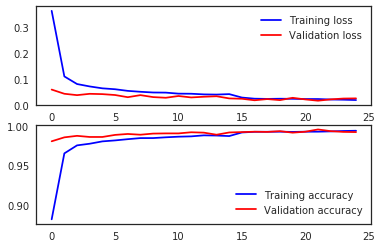

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

## 2.6. Plot confusion matrix

I imported this from [yassineghouzam's kernel](https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6). The confusion matrix is a nclasses x nclasses matrix (nclasses is the number of classes/labels in your classification problem).  The vertical axis shows the actual or true labels, while the horizontal axis shows the predicted labels, that is, the labels that the network has predicted.   

In an ideal case, the matrix would be an identity matrix. All the points in the matrix would be 0 except the ones in the diagonal. This would happen if the network predicted the correct label every time and each label were predicted correctly every time, but it rarely happens. A more common situation is that there are many values in the diagonal, many occurrences of correctly labeled images, while there are some scattered wrong-labeled-images. 

In this case the wrong values seem to be randomly disrtibuted, which gives no information about how to proceed. If there were a bigger number of visible errors, such as the digit 4 being mistaken by the digit 9 several times, it would be intuitive to understand what is happening, since depending on how someone writes the digit 4, it might be very similar to 9.

The case of the most popular digit, the digit 1,  is also noticeable (popular I mean there are 463 images corresponding to the digit 1, more than any other digit). In this case, the matrix shows that if the network predicts the digit 2, then it is always correct (the second column is all 0 except at digit 2), the network has perfect precision. However, the digit 2 is not always correctly labeled (second row), so the network doesn't have perfect recall. All in all, the more images available for a class, the less errors the network usually does. In an unrelated project I'm working with a small and imbalanced dataset and there's one class very under-represented and I'm having difficulties to predict it correctly.

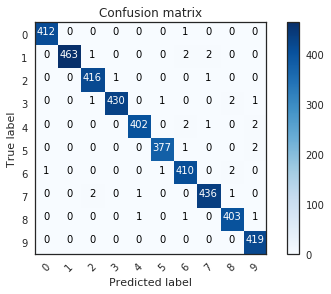

In [38]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
ypred_onehot = model.predict(xval)
# Convert predictions classes from one hot vectors to labels: [0 0 1 0 0 ...] --> 2
ypred = np.argmax(ypred_onehot,axis=1)
# Convert validation observations from one hot vectors to labels
ytrue = np.argmax(yval,axis=1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(ytrue, ypred)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes=range(nclasses))

## 2.7. Plot errors

Anoher useful approach is to plot the errors or wrongly labeled images, hoping it provides some intuition about what the network might be doing wrong. The cell outputs just 6 error images, you can change the range in the code to see other images. After running the cell, almost all images are very confusing and it would be difficult for a human to label them correctly. The third digit could be 1 or 7, the fourth a 0 or 6, the last could be either a 3 or a 8.. Even humans could make mistakes when labelling these images.

Generally speaking, a network might have high bias (high training loss) and you could spend hours trying to decrease it, but the network may have reached the best human result. If the best digit-recognizer can only achieve 90% accuracy (assume that this is true for the sake of the example), the network won't be able to do much better. So when the network reaches this point, it's usually the limit of what it can do. 

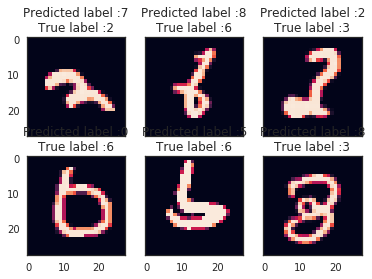

In [45]:
errors = (ypred - ytrue != 0) # array of bools with true when there is an error or false when the image is cor

ypred_er = ypred_onehot[errors]
ypred_classes_er = ypred[errors]
ytrue_er = ytrue[errors]
xval_er = xval[errors]

def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
            
# Probabilities of the wrong predicted numbers
ypred_er_prob = np.max(ypred_er,axis=1)

# Predicted probabilities of the true values in the error set
true_prob_er = np.diagonal(np.take(ypred_er, ytrue_er, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_er = ypred_er_prob - true_prob_er

# Sorted list of the delta prob errors
sorted_delta_er = np.argsort(delta_pred_true_er)

# Top 6 errors. You can change the range to see other images
most_important_er = sorted_delta_er[-6:]

# Show the top 6 errors
display_errors(most_important_er, xval_er, ypred_classes_er, ytrue_er)

# 3. Predict and save to csv

Once you are happy with your network, use the test data to create the prediction, this cell creates the csv format necessary to submit to the [Digit Recognizer](https://www.kaggle.com/c/digit-recognizer). 

> Remember that the csv is only created when you Commit the kernel, not when you run the cell in the editor. Make sure you commit the kernel, that it is successfull, and then in the kernel page (clicking the left arrows on the top left), there will be a tab called __Output__ where you can find your csv and submit it directly to the competition.

In [46]:
predictions = model.predict_classes(test, verbose=1)

submissions = pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                            "Label": predictions})

submissions.to_csv("mnist2908.csv", index=False, header=True)

28000/28000 [==============================] - 5s 165us/step


And that's it! I hope the explanations were informative and the code was clean and well-formatted. If there are any comments or suggestions whatsoever, if something is not clear or if you have any (positive) criticism towards the kernel, don't hesitate to tell me! 